In [1]:
from crop_classification import XGB_Model
import pandas as pd
from IPython.display import display

In [2]:
df = pd.read_csv('test_data.csv').drop('Unnamed: 0', axis=1)

In [5]:
a, b = XGB_Model.data_preprocess(df)

In [7]:
b

,oct_2f,nov_1f,nov_2f,dec_1f,dec_2f,jan_1f,jan_2f,feb_1f,feb_2f,mar_1f,mar_2f,apr_1f,sowing_period,harvest_period
0,152.8,136.6,122.9,157.2,175.6,189.5,191.2,183.1,171.4,134.4,124.5,117.2,Unknown,NaN
1,151.4,134.6,125.3,150.3,172.7,189.1,190.0,181.2,169.6,132.2,122.9,117.9,Unknown,NaN
2,140.1,120.0,112.3,128.5,159.4,187.0,191.7,189.0,189.1,182.2,150.6,118.4,Unknown,NaN
3,147.8,124.3,120.8,133.6,154.8,177.6,184.9,183.4,184.3,172.4,137.3,120.9,Unknown,NaN
4,147.8,128.3,120.8,132.3,151.0,185.3,188.0,185.7,189.5,187.9,160.6,119.7,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,183.5,174.6,146.3,124.4,121.0,138.4,184.8,184.3,191.0,190.3,176.6,150.6,dec_2f,Unknown
613,158.7,153.5,120.4,121.3,120.0,138.9,180.1,176.5,191.3,193.3,187.3,147.1,dec_2f,Unknown
621,184.3,180.4,160.9,122.6,119.0,137.2,179.2,181.0,188.8,188.5,182.6,158.4,dec_2f,Unknown
652,153.3,153.5,128.5,122.2,117.0,139.0,184.4,175.4,192.4,194.9,189.3,150.5,dec_2f,Unknown


In [10]:
pd.Series(XGB_Model.conformal_predictions(df, 0.08)).value_counts(dropna=False)

Wheat      637
NaN         43
Mustard      1
dtype: int64

In [18]:
1-b.max(axis=1).sort_values(ascending=True).head(10)

675    0.458641
550    0.458641
328    0.456994
473    0.411422
308    0.371870
671    0.360295
472    0.264572
611    0.259589
485    0.259589
610    0.259589
dtype: float32

In [23]:
1-b.loc[675]

Mustard    0.458641
wheat      0.541359
Name: 675, dtype: float32

In [6]:
data, outliers = XGB_Model.data_preprocess(df)

In [7]:
data

,oct_2f,nov_1f,nov_2f,dec_1f,dec_2f,jan_1f,jan_2f,feb_1f,feb_2f,mar_1f,mar_2f,apr_1f,sowing_period,harvest_period
0,126.6,119.8,119.0,128.7,157.5,185.6,190.3,186.8,187.9,180.6,146.2,120.2,nov_2f,mar_2f
1,152.1,142.8,128.7,134.0,163.1,184.0,186.7,185.2,185.9,176.7,150.9,124.1,dec_1f,mar_2f
2,132.8,122.3,120.5,124.0,146.0,180.7,188.1,184.1,185.6,176.9,156.7,120.0,dec_1f,mar_2f
3,167.8,158.2,150.7,129.0,148.8,178.8,185.2,180.9,185.4,174.4,148.9,122.0,dec_1f,mar_2f
4,154.0,120.2,117.8,118.0,138.9,171.7,187.7,188.2,191.8,191.4,171.4,123.3,dec_1f,mar_2f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,176.0,167.1,132.0,121.6,118.0,158.1,187.0,177.9,191.4,192.3,178.7,132.7,dec_2f,mar_2f
60,176.7,164.8,147.4,120.8,117.0,134.0,168.1,171.1,185.8,185.2,172.3,134.4,dec_2f,mar_2f
61,174.1,164.6,147.5,121.5,119.0,137.8,174.1,173.2,187.1,186.2,179.3,135.5,dec_2f,mar_2f
62,178.2,173.6,144.5,115.1,115.0,136.1,173.9,177.4,188.9,186.7,174.6,137.7,dec_2f,mar_2f


oct_2f    177.3
nov_1f    169.0
nov_2f    131.4
dec_1f    119.6
dec_2f    133.5
jan_1f    161.5
jan_2f    177.4
feb_1f    177.9
feb_2f    186.3
mar_1f    182.4
mar_2f    166.5
apr_1f    128.0
Name: 85, dtype: object

<Axes: >

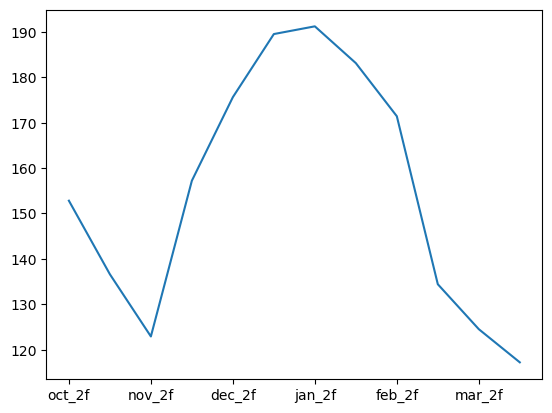

In [16]:
display(outliers.loc[85,'oct_2f':'apr_1f'])
outliers.loc[0,'oct_2f':'apr_1f'].plot()